In [ ]:
# Name : K.Sethu Naveen Kumar Reddy
# Enrollment : E22CSEU1072
# Batch : 36

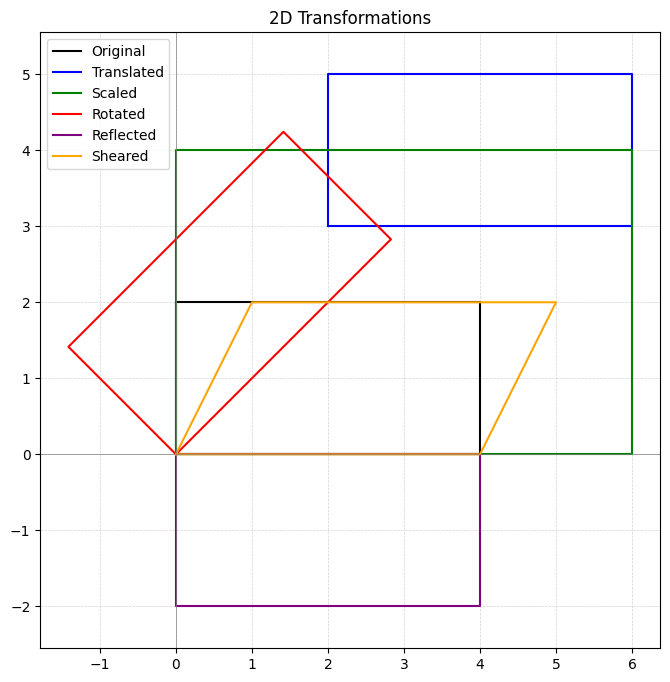

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a polygon
def plot_polygon(coords, label, color):
    coords = np.append(coords, [coords[0]], axis=0)  # Close the polygon
    plt.plot(coords[:, 0], coords[:, 1], color=color, label=label)

# Function for translation
def translate(coords, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    coords_homogeneous = np.c_[coords, np.ones(coords.shape[0])]
    transformed_coords = coords_homogeneous @ translation_matrix.T
    return transformed_coords[:, :2]

# Function for scaling
def scale(coords, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    coords_homogeneous = np.c_[coords, np.ones(coords.shape[0])]
    transformed_coords = coords_homogeneous @ scaling_matrix.T
    return transformed_coords[:, :2]

# Function for rotation
def rotate(coords, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                 [np.sin(rad), np.cos(rad), 0],
                                 [0, 0, 1]])
    coords_homogeneous = np.c_[coords, np.ones(coords.shape[0])]
    transformed_coords = coords_homogeneous @ rotation_matrix.T
    return transformed_coords[:, :2]

# Function for reflection about x-axis
def reflect_x(coords):
    reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    coords_homogeneous = np.c_[coords, np.ones(coords.shape[0])]
    transformed_coords = coords_homogeneous @ reflection_matrix.T
    return transformed_coords[:, :2]

# Function for shearing
def shear(coords, shx, shy):
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    coords_homogeneous = np.c_[coords, np.ones(coords.shape[0])]
    transformed_coords = coords_homogeneous @ shearing_matrix.T
    return transformed_coords[:, :2]

# Main function
def main():
    # Original rectangle coordinates (counterclockwise)
    rectangle = np.array([[0, 0], [4, 0], [4, 2], [0, 2]])

    plt.figure(figsize=(8, 8))

    # Plot original rectangle
    plot_polygon(rectangle, "Original", "black")

    # Apply transformations
    translated = translate(rectangle, 2, 3)
    plot_polygon(translated, "Translated", "blue")

    scaled = scale(rectangle, 1.5, 2)
    plot_polygon(scaled, "Scaled", "green")

    rotated = rotate(rectangle, 45)
    plot_polygon(rotated, "Rotated", "red")

    reflected = reflect_x(rectangle)
    plot_polygon(reflected, "Reflected", "purple")

    sheared = shear(rectangle, 0.5, 0)
    plot_polygon(sheared, "Sheared", "orange")

    # Configure the plot
    plt.axhline(0, color="gray", linewidth=0.5)
    plt.axvline(0, color="gray", linewidth=0.5)
    plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.axis("equal")
    plt.title("2D Transformations")
    plt.show()

if __name__ == "__main__":
    main()


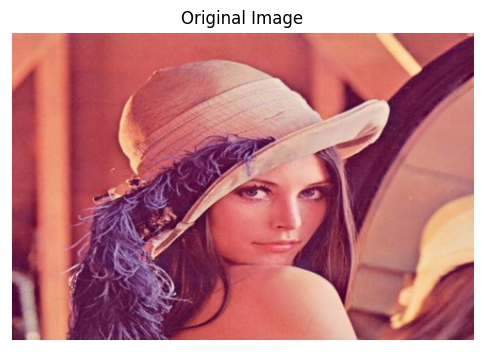

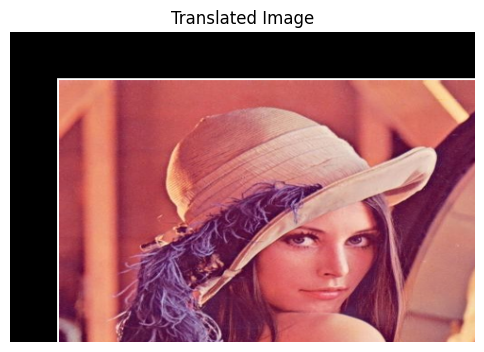

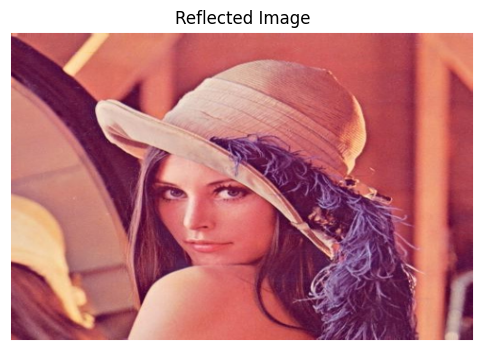

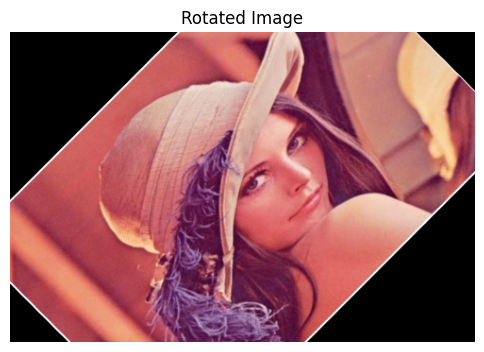

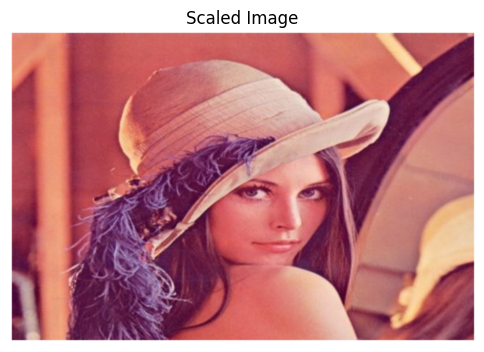

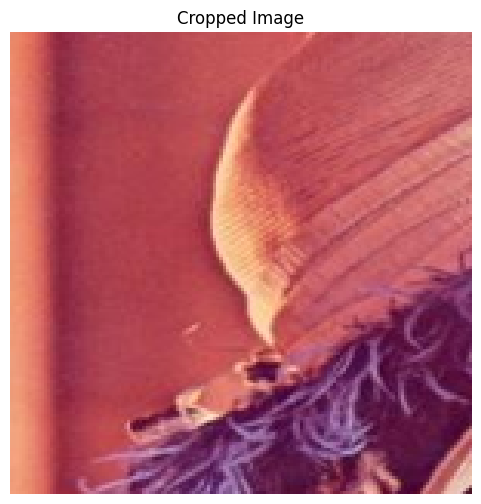

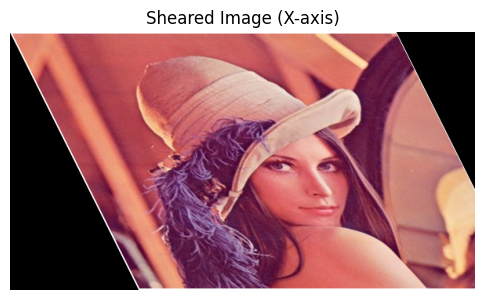

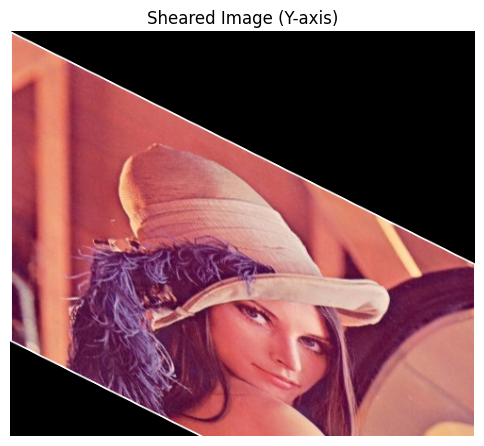

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/image-2.png')  # Replace with your image file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

def show_image(title, img):
  if(title=="Scaled Image"):
      plt.figure(figsize=(6, 6))
      plt.imshow(img)
      plt.title(title)
      plt.axis('off')
      plt.show()
  else:
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


# 1. Translation
rows, cols = image.shape[:2]
translation_matrix = np.float32([[1, 0, 50], [0, 1, 50]])  # Shift by (50, 50)
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# 2. Reflection
reflected_image = cv2.flip(image, 1)  # Flip along the y-axis

# 3. Rotation
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # 45-degree rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# 4. Scaling
scaled_image = cv2.resize(image, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)

# 5. Cropping
cropped_image = image[50:200, 50:200]  # Crop a region

# 6. Shearing in x-axis
shearing_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shearing_matrix, (cols + 100, rows))

# 7. Shearing in y-axis
shearing_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shearing_matrix_y, (cols, rows + 100))

# Display all transformations
show_image("Original Image", image)
show_image("Translated Image", translated_image)
show_image("Reflected Image", reflected_image)
show_image("Rotated Image", rotated_image)
show_image("Scaled Image", scaled_image)
show_image("Cropped Image", cropped_image)
show_image("Sheared Image (X-axis)", sheared_image_x)
show_image("Sheared Image (Y-axis)", sheared_image_y)